In [1]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
from utils.buffer_remove import buffer_remove
import matplotlib.pyplot as plt
from swatnet_infer import get_s1pair_nor
from utils.transform_xy import coor2coor, imagexy2geo, geo2imagexy



In [6]:
scene_id = '02'
path_s1as_scene = 'data/s1_ascend/s1_as_scene_' + scene_id + '.tif'
path_s1des_scene = 'data/s1_descend/s1_des_scene_' + scene_id + '.tif'



In [7]:
s1_as, s1_as_info = readTiff(path_in=path_s1as_scene)
s1_des, s1_des_info = readTiff(path_in=path_s1des_scene)
print(s1_as_info)



{'geoextent': (401909.45572276646, 440635.5144704822, 3831095.8595247255, 3865802.8874324984), 'geotrans': (401909.45572276646, 9.99640132878568, 0.0, 3865802.8874324984, 0.0, -9.99626379832176), 'geosrs': '32647', 'row': 3472, 'col': 3874, 'bands': 2}


In [8]:
s1_img_nor = get_s1pair_nor(s1_as=s1_as, s1_des=s1_des)



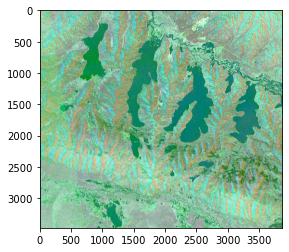

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
imgShow(s1_img_nor, color_bands=(2,1,0), clip_percent=2)


In [14]:
s1_img_nor.shape

(3472, 3874, 4)

In [16]:
s1_band_miss = s1_img_nor[:,:,0:2]
s1_band_miss.shape



(3472, 3874, 2)